# BRB Demonstration 

Belief rule base (BRB) systems are an extension of traditional IF-THEN rule based systems and capable of capturing complicated nonlinear causal relationships between antecedent attributes and consequents by supervised learning (optimization).  


<div class="alert alert-warning">
<b>This notebook demonstrate the BRB process for function $$f(x) = x\,sin(x^2)$$
</div>


# Step 1: Generate Data

In [117]:
import numpy as np
def generate_data():
    from random import uniform
    global L1
    L1 = []
    data = np.random.uniform(0,3,1000)
    L1.append(sorted(data))
    #return L1  
generate_data()

# Step 2: Generate Rules

In [118]:
#Set of referential values for x
RV = [0,0.5,1,1.5,2,2.5,3]
def List_of_Rule(RV):
    global r
    r = [[el] for el in RV] 
    #return r
List_of_Rule(RV)


def exp_val():
    import numpy as np
    global out1
    out1 = []
    for i in r:
        for j in i:
            v1 = j*np.sin(j**2)
            out1.append(round(v1,2)) 
exp_val()

import pandas as pd
d = {'Rule Number': ['1', '2', '3', '4','5','6','7'],'x or rule': r,'f(x)': out1,'Initial Rule weight': [1,1,1,1,1,1,1],'Initial Consequence {y1,y2,y3,y4,y5} : [0, 0.5, 1, 1.5, 2, 2.5, 3]':[[0,0.5,0.5,0,0],[0,0.44,0.56,0,0],[0,0.08,0.92,0,0],[0,0,0.84,0.16,0],[0.34,0.66,0,0,0],[0,0.53,0.47,0,0],[0,0,0.8,0.2,0]],'Initial attribute weight':[[1], [1], [1], [1], [1], [1], [1]]}
df_r = pd.DataFrame(d).set_index('Rule Number')
df_r = df_r.reindex(columns=['x or rule', 'f(x)', 'Initial Rule weight', 'Initial attribute weight', 'Initial Consequence {y1,y2,y3,y4,y5} : [0, 0.5, 1, 1.5, 2, 2.5, 3]'])
df_r


,x or rule,f(x),Initial Rule weight,Initial attribute weight,"Initial Consequence {y1,y2,y3,y4,y5} : [0, 0.5, 1, 1.5, 2, 2.5, 3]"
Rule Number,,,,,
1,[0],0.00,1,[1],"[0, 0.5, 0.5, 0, 0]"
2,[0.5],0.12,1,[1],"[0, 0.44, 0.56, 0, 0]"
3,[1],0.84,1,[1],"[0, 0.08, 0.92, 0, 0]"
4,[1.5],1.17,1,[1],"[0, 0, 0.84, 0.16, 0]"
5,[2],-1.51,1,[1],"[0.34, 0.66, 0, 0, 0]"
6,[2.5],-0.08,1,[1],"[0, 0.53, 0.47, 0, 0]"
7,[3],1.24,1,[1],"[0, 0, 0.8, 0.2, 0]"


# Step 3: Data Transformation

In [119]:
def Data_Transformation(RV):
    global L3
    L3 = []  
    for i in range(0,1):
        L2 = []
        if all(isinstance(x, (int,float)) for x in L1[i]):             
            for j in range(0,len(L1[i])): 
                match = [0 for col in range(len(RV))] 
                intial_bl_dis = list(zip(RV, match))   
                
                a_plus = min(filter(lambda y: y >= L1[i][j], RV))                  
                if RV.index(a_plus) > 0:
                    a_minus = RV[RV.index(a_plus)-1]
                else:
                    a_minus = RV[RV.index(a_plus)+1]
                                        
                alpha_minus = abs((a_plus - L1[i][j])/(a_plus - a_minus))
                alpha_plus = 1 - alpha_minus

                RV_index = RV.index(a_plus)      
                intial_bl_dis[RV_index] = (intial_bl_dis[RV_index][0],alpha_plus)
                intial_bl_dis[RV_index-1] = (intial_bl_dis[RV_index-1][0],alpha_minus)
                L2.append(intial_bl_dis)
            L3.append(L2)


# Step 4: Calculate rule activation weight

In [120]:
def Rule_Activation_Weight(rl_weight,att_weight):
    LL2 = []
    for i in range(0,len(L3)):  
        LL1 = []    
        for n in range(0,len(r)):   
            LL= []
            for j in range(0,len(L3[i])):  
                list_of_tuples = L3[i][j]
                #print(list_of_tuples)
                index_list = [ind for ind,  (a, _) in enumerate(list_of_tuples) if a == r[n][i]]
                LL.append(L3[i][j][index_list[0]][1])
            LL1.append(LL)      
        LL2.append(LL1)

    w2 = []  ##empty rule weight
    for j in range(0,len(LL2[0][0])):  
        w1 = []
        for n in range(0,len(r)):
            mul = 1
            for i in range(0,len(LL2)):
                mul = mul * (LL2[i][n][j]**att_weight[n][i]) 
        w2.append(w1)

    w3 = [] 
    for j in range(0,len(w2)): 
        s = 0
        for n in range(0,len(w2[j])):
            s = s + (w2[j][n]*rl_weight[n])    
        w3.append(s)    
   
    global act_weight
    act_weight = []
    for j in range(0,len(w2)):
        w4 = []
        for n in range(0,len(w2[j])):
            w4.append(w2[j][n]/w3[j])
        act_weight.append(w4)
    return act_weight 
    

# Step 5: Aggregate Beliefs
Evidential reasoning to aggregate beliefs of activated rules

In [135]:
def Aggregated_Belief_and_Output(belief_consequence):

    act_weight = np.array(act_weight)
    
    num_part2 = np.prod(1 - act_weight, axis=1)   

    num_part1 = []
    for i in range(0,len(act_weight)):
        temp = []
        for n in range(0,len(belief_consequence[0])): 
            prod2 = 1
            for k in range(0,len(r)): 
                prod2 = prod2 * ((act_weight[i][k]*belief_consequence[k][n])+1-act_weight[i][k])
            temp.append(prod2)
        num_part1.append(temp)
    num_part1 = np.asarray(num_part1)    

    deno_part1 = np.sum(num_part1, axis=1)
    deno_part2 = (len(belief_consequence[0])-1) * num_part2
    deno_part3 = np.copy(num_part2)
    deno_final = deno_part1 - deno_part2 - deno_part3

    num_final = np.subtract(num_part1, num_part2.reshape((-1, 1))) #change the shape of num_part2 for sunstraction    
    aggregate_belief = np.true_divide(num_final,deno_final.reshape((-1, 1))) #change the shape of deno for sunstraction
    simulated_output = np.sum(np.multiply(aggregate_belief,utility_consequence), axis=1) #multiply aggregared_belief with utility then sum
    return simulated_output    


# Stet 6: Expected output

In [95]:
def exp_output():
    import numpy as np
    global expected_output
    expected_output = []
    for i in range(0,len(L1)):
        for j in range(0,len(L1[i])):
            e = L1[i][j]*np.sin(L1[i][j]**2)
            expected_output.append(e)
exp_output()

# Plot: BRB output without training

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:233: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:234: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


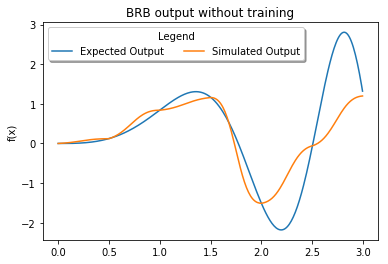

In [136]:
#Run these function to plot results before training/optimization
rl_weight1 = [1, 1, 1, 1, 1, 1, 1]
att_weight1=[[1], [1], [1], [1], [1], [1], [1]]
Rule_Activation_Weight(rl_weight1, att_weight1) 
belief_consequence1 =[[0,0.5,0.5,0,0],[0,0.44,0.56,0,0],[0,0.08,0.92,0,0],[0,0,0.84,0.16,0],[0.34,0.66,0,0,0],[0,0.53,0.47,0,0],[0,0,0.8,0.2,0]]
Aggregated_Belief_and_Output(belief_consequence1)
 
#Plot input and simulated & expected output
def plot_BRB_without_training(expected_output,simulated_output,title_plot):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.interpolate import spline
    
    R = np.array(L1[0])
    exp_output = np.array(expected_output)
    sim_output = np.array(simulated_output)
    
    R_smooth = np.linspace(R.min(), R.max(), 300)  #spline to smooth the function
    Ex_smooth = spline(R,exp_output, R_smooth)
    Sim_smooth = spline(R,sim_output, R_smooth)
    
    plt.plot(R_smooth,Ex_smooth, label='Expected Output')
    plt.plot(R_smooth,Sim_smooth,label='Simulated Output')
    plt.title('BRB output without training')
    plt.ylabel('f(x)')
    plt.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=2, shadow=True, title="Legend", fancybox=True)
    plt.show()
title_p1 = 'BRB output without training'
plot_BRB_without_training(expected_output,simulated_output,title_p1)

# Step 7: Difference between expected output and simulated output

In [72]:
def objective_minimize():
    global objective_value
    obj = 0
    for i in range(0,len(expected_output)):
        obj = obj + (expected_output[i]-simulated_output[i])**2
    objective_value = obj/len(expected_output)
objective_minimize()

# Step 8: Optimization

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


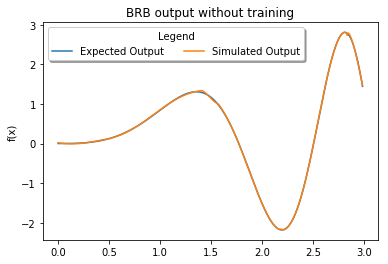

In [75]:
###Optimization
import numpy as np
from scipy.optimize import minimize
sample = [[[0, 0.5, 0, 0.5, 0], [0, 0.08, 0.92, 0, 0], [0.44, 0, 0.56, 0, 0], [0, 0, 0.84, 0.16, 0], [0.34, 0.66, 0, 0, 0], [0, 0.53, 0.47, 0, 0], [0, 0, 0.8, 0.2, 0]], [1, 1, 1, 1, 1, 1, 1], [[1], [1], [1], [1], [1], [1], [1]], [0, 0.5, 1, 1.5, 2, 2.3, 3]]
sample1 = sum(sample[0], [])
sample3 = sum(sample[2], [])
sam = []
for i in range(3,len(sample)):
    sam = sam + sample[i]  
flat_sample = sample1 + sample3 + sample[1] + sam 
l2_start = len(sample1) + len(sample[1]) + len(sample3) 

#OBJECTIVE FUNCTION
def scipy(x):  
    x = np.asarray(x)
    #belief_consequence
    belief_consequence = np.split(x[0:len(sample1)], len(sample[0]))
    
    ###rule weight
    rl_weight = []
    for i in range(len(sample1),len(sample1)+len(sample[1])):
        rl_weight.append(x[i])
      
    ###attribute weight
    att_weight = []
    l_start = len(sample1) + len(sample[1]) 
    att_weight = np.split(x[l_start:(l_start+len(sample3))], len(sample[2]))

    ###referential value
    RV = []
    l2_start = len(sample1) + len(sample[1]) + len(sample3) 
    for i in range(l2_start , l2_start+len(sample[1])):
        RV.append(x[i])
       
    Data_Transformation(RV)
    List_of_Rule(RV)
    Rule_Activation_Weight(rl_weight,att_weight)
    Aggregated_Belief_and_Output(belief_consequence)
    exp_output()
    objective_minimize() 
    return objective_value

#Bound constrains
b1 = [0.0, 1.0]
b2 = [0.0, 3.0]
l3_start = l2_start + len(sample[3])
constrain_bound = []
for i in range(0,l2_start):
    constrain_bound.append(b1)   
for i in range(l2_start, l2_start + len(sample[3])):
    constrain_bound.append(b2)
constrain_bound[l2_start] = [0.0,0.0]
constrain_bound[l2_start + len(sample[3]) - 1] = [3.0,3.0]   
#print('Bounded constrains are'+str(constrain_bound))

#Equality constrains
def belief_summation_constraint(z):
    def g(x):
        belief_consequence = np.split(x[0:len(sample1)], len(sample[0]))
        bel_sum = 1
        for k in range(0,len(belief_consequence[z])):
            bel_sum = bel_sum - belief_consequence[z][k]
        return bel_sum
    return g

#Inequality constrains
def ref_value_constraint(t):
    def h(x): 
        ###referential value
        RV = []    
        l2_start = len(sample1) + len(sample[1]) + len(sample3) 
        for i in range(l2_start,l2_start+len(sample[1])):
            RV.append(x[i])
        return RV[t+1] - RV[t] - 0.1
    return h

cons = []
for z in range(len(sample[0])):
    cons.append({'type': 'eq', 'fun': belief_summation_constraint(z)})
for t in range(len(sample[3])-1):
    cons.append({'type': 'ineq', 'fun': ref_value_constraint(t)})
np.array(cons)

#initial value
x0 = [[[0,0.5,0.5,0,0],[0,0.44,0.56,0,0],[0,0.08,0.92,0,0],[0,0,0.84,0.16,0],[0.34,0.66,0,0,0],[0,0.53,0.47,0,0],[0,0,0.8,0.2,0]], [1, 1, 1, 1, 1, 1, 1], [[1], [1], [1], [1], [1], [1], [1]], [0,0.5,1,1.5,2,2.5,3]]
sample01 = sum(x0[0], [])
sample03 = sum(x0[2], [])
flat_x0 = sample01 + x0[1] + sample03 + x0[3]

scipy(flat_x0)
solution = minimize(scipy,flat_x0,method='SLSQP',bounds=constrain_bound, constraints=cons,options={'ftol': 1e-06})
x = solution.x

title_p2 = 'BRB output after training'
plot_BRB_without_training(expected_output,simulated_output,title_p2)



# Plot: BRB output after training

# Trained parameter values

In [89]:
#belief
belief_consequence = np.split(x[0:len(sample1)], len(sample[0]))

#rule weight
rl_weight = []
for i in range(len(sample1),len(sample1)+len(sample[1])):
    rl_weight.append(x[i])
    
###attribute weight
att_weight = []
l_start = len(sample1) + len(sample[1]) 
att_weight = np.split(x[l_start:(l_start+len(sample3))], len(sample[2]))

###referential value
RV = []    
l2_start = len(sample1) + len(sample[1]) + len(sample3) 
for i in range(l2_start,l2_start+len(sample[1])):
    RV.append(x[i])

import pandas as pd
def exp_val():
    import numpy as np
    global out1
    out1 = []
    for j in RV:
        v1 = j*np.sin(j**2)
        out1.append(round(v1,2)) 
exp_val()

d = {'Rule Number': ['1', '2', '3', '4','5','6','7'],'x or rule': RV,'f(x)': out1,'Rule weight': rl_weight,'Consequence: [0.0, 0.485, 1.412, 1.574, 2.191, 2.838, 3.0]':belief_consequence,'Attribute weight':att_weight}
df_r = pd.DataFrame(d).set_index('Rule Number')
df_r = df_r.reindex(columns=['x or rule', 'f(x)', 'Rule weight', 'Attribute weight', 'Consequence: [0.0, 0.485, 1.412, 1.574, 2.191, 2.838, 3.0]'])
df_r


,x or rule,f(x),Rule weight,Attribute weight,"Consequence: [0.0, 0.485, 1.412, 1.574, 2.191, 2.838, 3.0]"
Rule Number,,,,,
1,0.000000,0.00,1.000000,[0.916477105745],"[0.00231926027794, 0.544395700931, 0.380152595..."
2,0.485834,0.11,1.000000,[0.810817797387],"[4.71237471234e-06, 0.51646014288, 0.402588598..."
3,1.412638,1.29,0.966280,[0.848398197388],"[0.0110135068188, 0.0164222387723, 0.767694972..."
4,1.574480,0.97,1.000000,[0.694315486049],"[0.11590565616, 0.0554929787569, 0.56710065153..."
5,2.191004,-2.18,0.867861,[0.633261816227],"[0.864913192573, 0.0924378445549, 9.1479558303..."
6,2.838026,2.78,0.747213,[0.711490223901],"[0.0174354464001, 0.0492746363745, 0.000669513..."
7,3.000000,1.24,0.669531,[0.454526694736],"[0.280303169059, 0.0421873319183, 0.0048950159..."
